In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import cv2
from pathlib import Path
import keras
import tensorflow as tf
from PIL import Image,ImageDraw, ImageFont
from tensorflow.keras.preprocessing import image
import seaborn as sns
from tensorflow.keras.models import load_model
import time
from patchify import patchify, unpatchify
from tensorflow.keras.preprocessing.image import ImageDataGenerator , array_to_img, img_to_array, load_img

In [ ]:
path = r"/content/drive/MyDrive/model/model_Xception_kaggle.h5"
model = load_model(path)

In [ ]:
def load_pic(path):
  img = image.load_img(path)
  img_array = image.img_to_array(img)
  img_array = img_array/255.0
  return img_array

In [ ]:
def resize(img_array):
  new_img = cv2.resize(img_array, (1024,1024), interpolation=cv2.INTER_NEAREST)
  return new_img


In [ ]:
def slice_img(new_img):
  patch_list = []
  new_patches  = patchify(new_img, (256,256,3), step=256)
  new_patches = np.squeeze(new_patches)
  for i in range(new_patches.shape[0]):
    for j in range(new_patches.shape[1]):
      patch = new_patches[i,j,:,:,:]
      patch_list.append(patch)
  
  return patch_list

In [ ]:
def localization(patch_list, model):
  re_patch = [cv2.resize(patch_list[i], (299,299), interpolation=cv2.INTER_NEAREST) for i in range(len(patch_list))]
  ex_patch = [np.expand_dims(re_patch[i], axis=0) for i in range(len(re_patch))]
  pred = [model.predict(ex_patch[i]) for i in range(len(ex_patch))]
  index = [np.argmax(pred[i]) for i in range(len(pred))]
  brush_patch = []
  for i in range(len(index)):
    if index[i] == 1:
      brush_patch.append(cv2.cvtColor(patch_list[i], cv2.COLOR_RGB2HSV))
    elif index[i] ==0:
      brush_patch.append(patch_list[i])
  reconstructed_image = unpatchify(np.array(brush_patch).reshape(4,4,1,256,256,3), new_img.shape)
  plt.figure(figsize=(15,10))
  plt.subplot(1,2,1)
  plt.title("Localization")
  plt.imshow(reconstructed_image)
  plt.figure(figsize=(15,10))
  plt.subplot(1,2,2)
  plt.title("Original")
  plt.imshow(new_img)
  plt.show()

In [ ]:
path1 = r"/content/drive/MyDrive/model/model_Xception_addkaggle.h5"
model1 = load_model(path1)

In [ ]:
path2 = r"/content/drive/MyDrive/model/model_InceptionV3_addkaggle.h5"
model2 = load_model(path2)

In [ ]:
img_array = load_pic(r"/content/drive/MyDrive/test/LINE_ALBUM_R72_221114_20.jpg")
new_img = resize(img_array)
patch_list = slice_img(new_img)

1/1 [==============================] - 0s 26ms/step


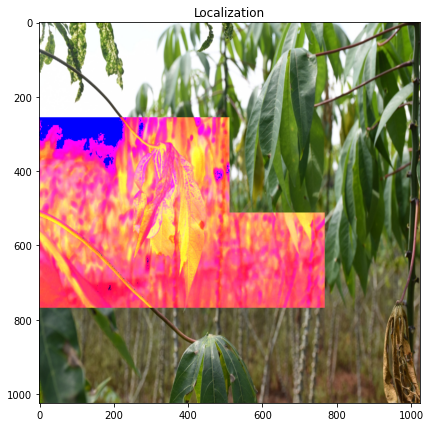

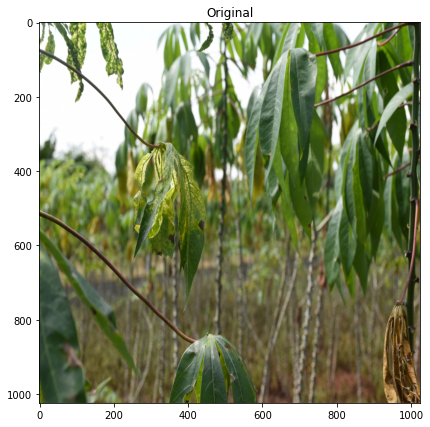

In [ ]:
localization(patch_list, model)